# 人臉辨識資料集(LFW)

## 1. 載入相關套件

In [1]:
from sklearn.datasets import fetch_lfw_people

## 載入資料集

In [2]:
ds = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

## 2. 資料清理、資料探索與分析

In [3]:
# 資料集說明
print(ds.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [4]:
# 資料維度
n_samples, h, w = ds.images.shape

# 
X = ds.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = ds.target
target_names = ds.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [5]:
ds.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [6]:
# 是否有含遺失值(Missing value)
import numpy as np
np.isnan(X).sum()

0

## 繪圖

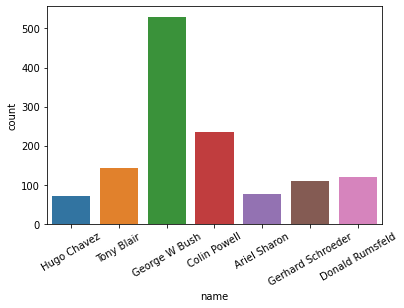

In [42]:
# y 各類別資料筆數統計
import pandas as pd

df_y = pd.DataFrame({'code':y})
df_y['name'] = df_y['code'].map(dict(enumerate(ds.target_names)))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='name', data=df_y)
plt.xticks(rotation=30);

In [10]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

3    530
1    236
6    144
2    121
4    109
0     77
5     71
dtype: int64

## 3. 不須進行特徵工程

## 4. 資料分割

In [11]:
# 資料分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1030, 1850), (258, 1850), (1030,), (258,))

## 特徵縮放

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)

## 6. 模型訓練

In [37]:
clf.fit(X_train_std, y_train)

LogisticRegression(max_iter=500)

## 7. 模型計分

In [38]:
y_pred = clf.predict(X_test_std)
y_pred

array([6, 6, 6, 5, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 4, 3, 3, 3, 4, 2, 3, 5,
       6, 3, 2, 3, 3, 1, 3, 0, 3, 0, 1, 2, 4, 3, 6, 1, 5, 1, 1, 2, 5, 3,
       1, 3, 6, 1, 3, 3, 3, 3, 3, 3, 6, 3, 2, 3, 0, 3, 0, 1, 2, 1, 0, 1,
       6, 0, 2, 2, 3, 3, 3, 3, 1, 3, 3, 1, 4, 1, 2, 3, 3, 0, 6, 0, 3, 0,
       1, 0, 3, 3, 0, 0, 4, 3, 5, 5, 3, 3, 3, 0, 3, 6, 1, 3, 1, 2, 4, 3,
       3, 3, 3, 1, 3, 1, 3, 3, 4, 1, 3, 1, 3, 3, 3, 3, 3, 2, 1, 3, 6, 3,
       3, 2, 1, 1, 2, 5, 3, 3, 1, 1, 4, 6, 3, 2, 3, 2, 3, 2, 1, 2, 3, 6,
       4, 0, 3, 3, 1, 3, 6, 6, 2, 3, 1, 5, 6, 6, 4, 3, 3, 6, 0, 3, 3, 1,
       1, 0, 3, 3, 3, 2, 2, 1, 4, 6, 5, 4, 1, 4, 3, 3, 6, 3, 3, 3, 3, 6,
       3, 1, 3, 2, 1, 3, 3, 1, 3, 4, 2, 3, 4, 2, 4, 6, 3, 4, 3, 3, 3, 6,
       4, 5, 6, 0, 3, 1, 3, 3, 3, 1, 3, 1, 2, 6, 4, 1, 3, 1, 3, 4, 3, 1,
       3, 3, 3, 6, 3, 0, 3, 6, 3, 1, 3, 1, 6, 2, 4, 3], dtype=int64)

In [39]:
# 計算準確率
from sklearn.metrics import accuracy_score

print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

87.60%


In [40]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  2  0  2  0  0  0]
 [ 0 39  1  5  0  0  1]
 [ 2  2 23  2  0  0  1]
 [ 0  0  0 98  1  0  1]
 [ 0  0  1  0 18  0  2]
 [ 1  0  0  1  1 10  0]
 [ 0  2  1  2  1  0 23]]


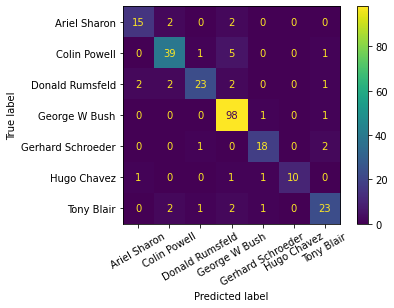

In [41]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.xticks(rotation=30)
plt.show()

## 8. 模型評估，暫不進行

## 9. 模型佈署

## 10.模型預測，暫不進行